<font color="gray">

### 0. Ensure CUDA and torch is loaded correctly


Also ensure on Rockfish that you are using only 1/however GPUs you specified, not 4

</font>

In [1]:
import torch
print(torch.cuda.device_count())

1


If the below says 10.2, you will get the `sm_80` CUDA compatibility warning

In [6]:
torch.version.cuda

'11.3'

# 1. Data Preprocessing

## 1.1 Load Data

<font color="gray"><i>Pancreatic-healthy and pancreatic-tumor data provided by Zongwei</i></font>

In [1]:
import os

# Define the HuggingFace repository and local path
ct_filename = "ct.nii.gz"
pancreas_segmentations_filename = "segmentations/pancreas.nii.gz"

download_folder = "./data"
healthy_pancreas_folder = os.path.join(download_folder, "healthy-pancreas")
pancreatic_tumor_folder = os.path.join(download_folder, "pancreatic-tumor")


os.makedirs(healthy_pancreas_folder, exist_ok=True)
os.makedirs(pancreatic_tumor_folder, exist_ok=True)

In [2]:
pancreatic_tumor = [
    'BDMAP_00000087',
    'BDMAP_00000093',
    'BDMAP_00000192',
    'BDMAP_00000225',
    'BDMAP_00000243',
    'BDMAP_00000324',
    'BDMAP_00000332',
    'BDMAP_00000416',
    'BDMAP_00000541',
    'BDMAP_00000696',
    'BDMAP_00000714',
    'BDMAP_00000715',
    'BDMAP_00000855',
    'BDMAP_00000940',
    'BDMAP_00000956',
    'BDMAP_00001040',
    'BDMAP_00001067',
    'BDMAP_00001096',
    'BDMAP_00001125',
    'BDMAP_00001205',
    'BDMAP_00001331',
    'BDMAP_00001461',
    'BDMAP_00001464',
    'BDMAP_00001476',
    'BDMAP_00001523',
    'BDMAP_00001564',
    'BDMAP_00001605',
    'BDMAP_00001617',
    'BDMAP_00001646',
    'BDMAP_00001649',
    'BDMAP_00001704',
    'BDMAP_00001746',
    'BDMAP_00001754',
    'BDMAP_00001823',
    'BDMAP_00001862',
    'BDMAP_00002021',
    'BDMAP_00002278',
    'BDMAP_00002298',
    'BDMAP_00002328',
    'BDMAP_00002387',
    'BDMAP_00002402',
    'BDMAP_00002616',
    'BDMAP_00002690',
    'BDMAP_00002793',
    'BDMAP_00002944',
    'BDMAP_00002945',
    'BDMAP_00003017',
    'BDMAP_00003036',
    'BDMAP_00003133',
    'BDMAP_00003141',
    'BDMAP_00003244',
    'BDMAP_00003326',
    'BDMAP_00003347',
    'BDMAP_00003427',
    'BDMAP_00003440',
    'BDMAP_00003451',
    'BDMAP_00003502',
    'BDMAP_00003551',
    'BDMAP_00003590',
    'BDMAP_00003592',
    'BDMAP_00003612',
    'BDMAP_00003658',
    'BDMAP_00003744',
    'BDMAP_00003776',
    'BDMAP_00003781',
    'BDMAP_00003812',
    'BDMAP_00004060',
    'BDMAP_00004106',
    'BDMAP_00004128',
    'BDMAP_00004229',
    'BDMAP_00004231',
    'BDMAP_00004447',
    'BDMAP_00004494',
    'BDMAP_00004511',
    'BDMAP_00004672',
    'BDMAP_00004770',
    'BDMAP_00004804',
    'BDMAP_00004847',
    'BDMAP_00004880',
    'BDMAP_00004927',
    'BDMAP_00004964',
    'BDMAP_00004969',
    'BDMAP_00004992',
    'BDMAP_00005020',
    'BDMAP_00005022',
    'BDMAP_00005070',
    'BDMAP_00005074',
    'BDMAP_00005075',
    'BDMAP_00005185'
]


healthy_pancreas = [
    'BDMAP_00000002',
    'BDMAP_00000110',
    'BDMAP_00000198',
    'BDMAP_00000246',
    'BDMAP_00000351',
    'BDMAP_00000598',
    'BDMAP_00000673',
    'BDMAP_00000682',
    'BDMAP_00000764',
    'BDMAP_00000846',
    'BDMAP_00000878',
    'BDMAP_00000928',
    'BDMAP_00001002',
    'BDMAP_00001348',
    'BDMAP_00001662',
    'BDMAP_00001774',
    'BDMAP_00001820',
    'BDMAP_00001871',
    'BDMAP_00001942',
    'BDMAP_00001943',
    'BDMAP_00002059',
    'BDMAP_00002212',
    'BDMAP_00002236',
    'BDMAP_00002569',
    'BDMAP_00002650',
    'BDMAP_00002753',
    'BDMAP_00002763',
    'BDMAP_00003013',
    'BDMAP_00003033',
    'BDMAP_00003085',
    'BDMAP_00003154',
    'BDMAP_00003265',
    'BDMAP_00003577',
    'BDMAP_00003644',
    'BDMAP_00003876',
    'BDMAP_00004098',
    'BDMAP_00004142',
    'BDMAP_00004202',
    'BDMAP_00004360',
    'BDMAP_00004458',
    'BDMAP_00004480',
    'BDMAP_00005110'
]

#### Optional - download more data files from 🤗

<font color="color: #ff7f50;">

- [x] Download more, at least 30 Healthy and UnHealthy
- [x] Update this to also download Labels file (i.e. download full folders)

<!-- - [ ]  -->
</font>

In [4]:
import os
from huggingface_hub import login
# Need a HF token. Set it as an OS env var and don't commit it to git!

from huggingface_hub import hf_hub_download

repo_id = "AbdomenAtlas/AbdomenAtlas1.0Mini"

# GUI doesn't work with Jupyter using non-local ipykernel
login()
# login(token="")

Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid (permission: fineGrained).
Your token has been saved to /Users/ariellubonja/.cache/huggingface/token
Login successful


In [ ]:
from tqdm import tqdm

def download_ct_and_segmentation_files(folder_list, target_folder):
    for folder_name in tqdm(folder_list, desc="Downloading Files", unit="folder", ncols=100, leave=True):
        files_to_download = [
            os.path.join(folder_name, "ct.nii.gz"),
            os.path.join(folder_name, "segmentations", "pancreas.nii.gz")
        ]
        for filename in files_to_download:
            try:
                downloaded_file = hf_hub_download(repo_id=repo_id, filename=filename, repo_type="dataset", local_dir=target_folder, local_dir_use_symlinks=False)
            except Exception as e:
                print(f"Error downloading {filename}: {e}")

# Download healthy and sick files into respective folders
download_ct_and_segmentation_files(healthy_pancreas, healthy_pancreas_folder)
download_ct_and_segmentation_files(pancreatic_tumor, pancreatic_tumor_folder)

## 1.2 Select out area corresponding to Pancreas

<span style="color: #4682B4;">🔧 Implementation</span>

- [ ] TODO make sure the mask-out process is correct. Shouldn't the raw file be a mask itself?


<span style="color: #2E8B57;">🧠 Research</span>

- [ ] CT Background: Do I just use a mask? This will 0-out the surrounding organs

In [3]:
import nibabel as nib
import numpy as np
import os

def extract_pancreas_from_ct(ct_scan_path, segmentation_path, output_path=None):
    # Load the CT scan and the segmentation file
    ct_scan = nib.load(ct_scan_path)
    ct_data = ct_scan.get_fdata()

    pancreas_segmentation = nib.load(segmentation_path)
    pancreas_data = pancreas_segmentation.get_fdata()

    # TODO make sure the below is correct. Shouldn't the raw file be a mask itself?
    # Create a binary mask where the pancreas region is 1 and everything else is 0
    pancreas_mask = (pancreas_data > 0)  # Assuming the pancreas region has a non-zero label

    # Apply the mask to the CT scan
    pancreas_only_ct = ct_data * pancreas_mask

    # Save the result (optional)
    if output_path:
        pancreas_only_nifti = nib.Nifti1Image(pancreas_only_ct, ct_scan.affine)
        nib.save(pancreas_only_nifti, output_path)

    return pancreas_only_ct

In [4]:
# Test for 1st image in dataset
ct_scan_path = os.path.join(pancreatic_tumor_folder, pancreatic_tumor[0], ct_filename)
segmentation_path = os.path.join(pancreatic_tumor_folder, pancreatic_tumor[0], pancreas_segmentations_filename)

pancreas_only_ct = extract_pancreas_from_ct(ct_scan_path, segmentation_path)
print("Pancreas region extracted")

Pancreas region extracted


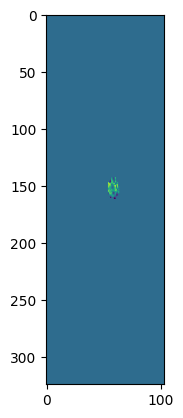

In [5]:
from matplotlib import pyplot as plt

plt.imshow(pancreas_only_ct[150])

In [6]:
pancreas_only_ct.shape

(452, 324, 103)

In [7]:
raw_ct = nib.load(ct_scan_path)

raw_ct.shape
# from matplotlib import pyplot as plt

# plt.plot(raw_ct)

(452, 324, 103)

This operation does not change the Shape

In [30]:
np.max(raw_ct.get_fdata())

999.9999997671694

(array([1735605.,  315091.,  409310.,  351636.,  266134.,  279298.,
         337867.,  286829.,  193066.,   90086.,   56438.,   43719.,
          32504.,   30161.,   28147.,   23275.,   22834.,   22289.,
          18900.,   18905.,   19455.,   17026.,   18897.,   17596.,
          16576.,   18300.,   17755.,   16790.,   19232.,   18737.,
          18372.,   21019.,   19180.,   20330.,   20813.,   18581.,
          19311.,   19726.,   18288.,   19734.,   21392.,   20087.,
          29143.,  113749.,  426325.,  903263.,  969034.,  702534.,
         580924.,  513544.,  688481.,  976317.,  968073.,  894137.,
         941615.,  546836.,  219392.,   70902.,   40132.,   40873.,
          38491.,   29361.,   28091.,   24651.,   21396.,   22587.,
          20231.,   18071.,   19229.,   17193.,   15550.,   16156.,
          13929.,   13606.,   13225.,   11390.,   11225.,   11171.,
           9450.,    9220.,    9277.,    8004.,    8194.,    7289.,
           6591.,    6689.,    6169.,    5282., 

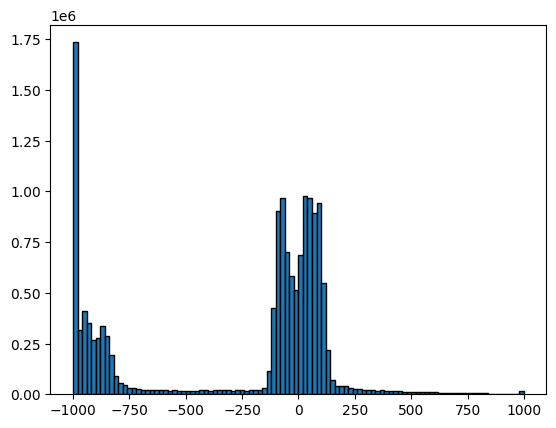

In [34]:
data_flat = raw_ct.get_fdata().flatten()

# Plot the histogram
plt.hist(data_flat, bins=100, edgecolor='black')

In [31]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os

def plot_pancreas_slices(ct_scan_path, segmentation_path, slice_interval=20, output_dir=None, vmin=-1000, vmax=1000):
    """
    Loads the CT scan and pancreas segmentation, applies the mask, and plots every nth slice along z axis.

    Parameters:
        ct_scan_path (str): Path to the CT scan NIfTI file.
        segmentation_path (str): Path to the pancreas segmentation NIfTI file.
        slice_interval (int): Interval between slices to plot (default is 20).
        output_dir (str): Directory to save the plotted slices. If None, slices are displayed but not saved.
    """
    # Load CT scan
    ct_scan = nib.load(ct_scan_path)
    ct_data = ct_scan.get_fdata()
    
    # Load segmentation
    segmentation = nib.load(segmentation_path)
    segmentation_data = segmentation.get_fdata()
    
    # Create mask and apply to CT scan
    pancreas_mask = segmentation_data > 0  # Assuming pancreas labels are greater than 0
    masked_ct = ct_data * pancreas_mask
    
    # Get the number of slices along the z-axis
    num_slices = masked_ct.shape[2]
    
    # Prepare output directory
    if output_dir:
        os.makedirs(output_dir, exist_ok=True)
    
    # Plot and save/display slices
    for slice_index in range(0, num_slices, slice_interval):
        slice_data = masked_ct[:, :, slice_index]
        
        # Skip slices with no pancreas data
        if np.any(slice_data):
            plt.figure(figsize=(8, 8))
            plt.imshow(slice_data.T, cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
            plt.title(f'Slice {slice_index}')
            plt.axis('off')
            
            if output_dir:
                output_path = os.path.join(output_dir, f'slice_{slice_index}.png')
                plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
                plt.close()
            else:
                plt.show()
        else:
            print(f"Slice {slice_index} has no pancreas data. Skipping.")

Slice 0 has no pancreas data. Skipping.
Slice 5 has no pancreas data. Skipping.
Slice 10 has no pancreas data. Skipping.
Slice 15 has no pancreas data. Skipping.
Slice 20 has no pancreas data. Skipping.
Slice 25 has no pancreas data. Skipping.
Slice 30 has no pancreas data. Skipping.
Slice 35 has no pancreas data. Skipping.


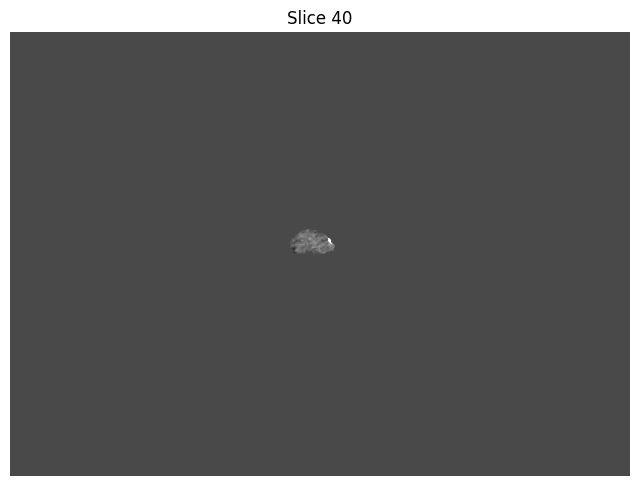

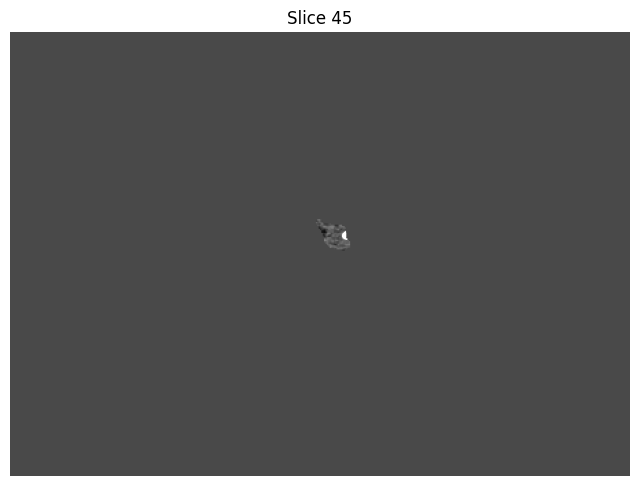

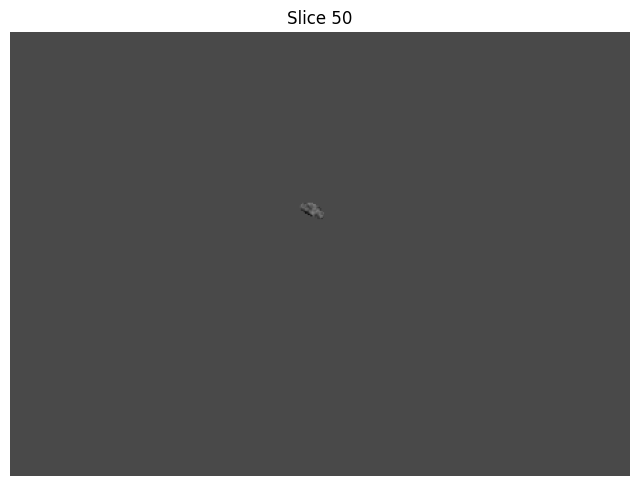

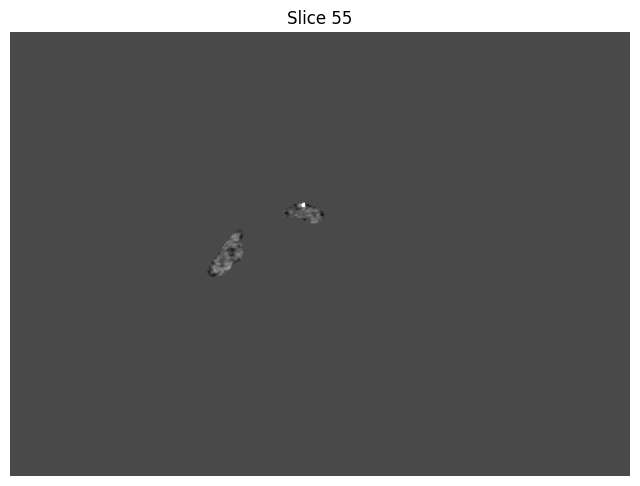

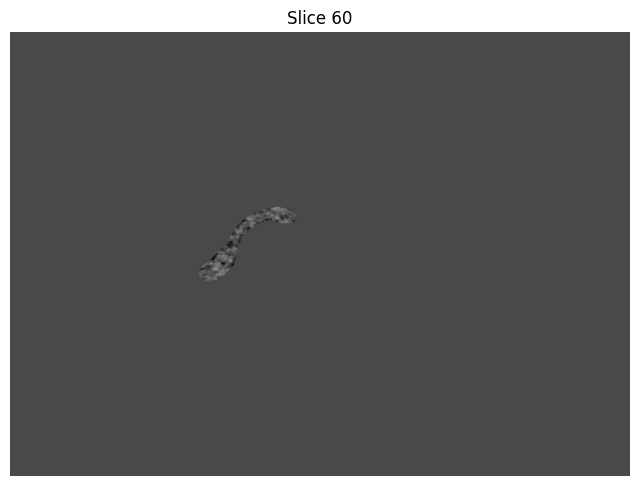

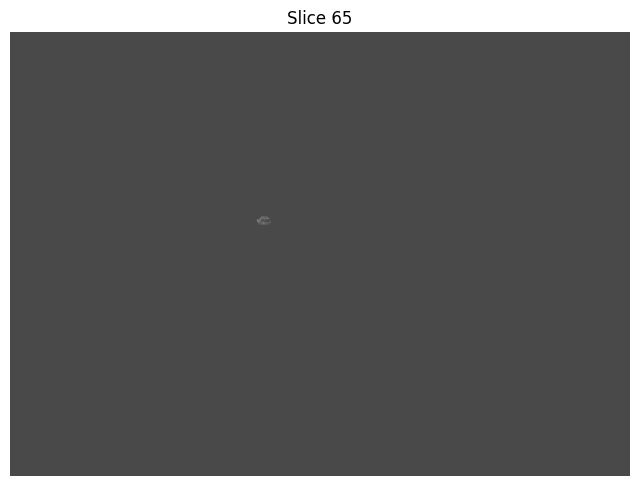

Slice 70 has no pancreas data. Skipping.
Slice 75 has no pancreas data. Skipping.
Slice 80 has no pancreas data. Skipping.
Slice 85 has no pancreas data. Skipping.
Slice 90 has no pancreas data. Skipping.
Slice 95 has no pancreas data. Skipping.
Slice 100 has no pancreas data. Skipping.


In [39]:
plot_pancreas_slices(ct_scan_path, segmentation_path, slice_interval = 5, vmin=-100, vmax=250)

### 1.3 Select only $96^3$ subcubes that have $\geq$ 1 pixel overlap w/ Pancreas seg.

#### 1.3.1 Actually, what is the size of the Pancreas mask in general?


- [ ] Plot histograms of all data's sizes
- [ ] Fit that whole thing into a single cube

In [8]:
import nibabel as nib
import numpy as np

def get_pancreas_bounding_box(ct_scan_path, segmentation_path, margin=20):
    """
    Loads the CT scan and pancreas segmentation, and returns the bounding box of the pancreas 
    with an additional margin of 'n' pixels in each direction.

    Parameters:
        ct_scan_path (str): Path to the CT scan NIfTI file.
        segmentation_path (str): Path to the pancreas segmentation NIfTI file.
        margin (int): Number of pixels to add as a margin around the pancreas bounding box.

    Returns:
        cropped_ct: Cropped CT scan containing only the pancreas region plus the margin.
        cropped_segmentation: Cropped segmentation corresponding to the CT scan.
        bbox: Bounding box coordinates with margins applied (z_min, z_max, y_min, y_max, x_min, x_max).
    """
    # Load CT scan and segmentation mask
    ct_scan = nib.load(ct_scan_path)
    ct_data = ct_scan.get_fdata()
    
    segmentation = nib.load(segmentation_path)
    segmentation_data = segmentation.get_fdata()

    # Find the non-zero regions (pancreas) in the segmentation
    pancreas_voxels = np.argwhere(segmentation_data > 0)
    
    # Get the bounding box of the pancreas
    z_min, y_min, x_min = pancreas_voxels.min(axis=0)
    z_max, y_max, x_max = pancreas_voxels.max(axis=0)
    
    # Apply margin while making sure the indices are within bounds
    z_min = max(0, z_min - margin)
    y_min = max(0, y_min - margin)
    x_min = max(0, x_min - margin)
    
    z_max = min(ct_data.shape[0] - 1, z_max + margin)
    y_max = min(ct_data.shape[1] - 1, y_max + margin)
    x_max = min(ct_data.shape[2] - 1, x_max + margin)

    # Crop the CT scan and segmentation to the bounding box with margins
    cropped_ct = ct_data[z_min:z_max+1, y_min:y_max+1, x_min:x_max+1]
    cropped_segmentation = segmentation_data[z_min:z_max+1, y_min:y_max+1, x_min:x_max+1]

    return cropped_ct, cropped_segmentation, (z_min, z_max, y_min, y_max, x_min, x_max)

In [9]:
cropped_ct, cropped_segmentation, bbox = get_pancreas_bounding_box(ct_scan_path, segmentation_path, margin=20)

print("Bounding Box with Margin:", bbox)

Bounding Box with Margin: (117, 268, 121, 220, 16, 86)


In [10]:
cropped_ct.shape

(152, 100, 71)

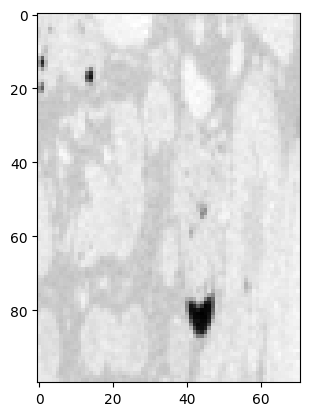

In [12]:
plt.imshow(cropped_ct[4,:,:], cmap='gray')

In [39]:
import matplotlib.patches as patches

def plot_cropped_pancreas_and_bbox(raw_ct, cropped_ct, bbox, slice_indices=None, vmin=-1000, vmax=1000):
    """
    Plots a slice of the original CT scan with a red box indicating the cropped region and the corresponding cropped CT slice.
    
    Parameters:
        raw_ct (ndarray): The full original CT scan (numpy array).
        cropped_ct (ndarray): The cropped CT scan (pancreas region).
        bbox (tuple): Bounding box coordinates of the cropped region (z_min, z_max, y_min, y_max, x_min, x_max).
        slice_indices (list[int]): Optional. Index of the slice to visualize (defaults to the middle of the bounding box).
        vmin, vmax: Intensity values for CT scan contrast adjustment.
    """
    z_min, z_max, y_min, y_max, x_min, x_max = bbox
    
    # Choose a slice to visualize (defaults to the middle slice in the z-dimension of the bounding box)
    if slice_indices is None:
        slice_indices = [(z_max - z_min) // 2]
    
    # Ensure slice_index is within bounds of the original raw CT
    # slice_index = max(0, min(slice_index, raw_ct.shape[2] - 1))

    # Plot Original CT slice
    for slice_index in slice_indices:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(raw_ct[:, :, slice_index].T, cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
        plt.title(f"Original CT Slice {slice_index} with Bounding Box")
        plt.axis('off')
        
        # Add a red rectangle representing the bounding box
        ax = plt.gca()
        rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        
        # Plot cropped pancreas slice
        plt.subplot(1, 2, 2)
        z_offset = slice_index - z_min  # Adjust for the cropped z-slice
        if 0 <= z_offset < cropped_ct.shape[2]:  # Check if slice is in bounds of cropped data
            plt.imshow(cropped_ct[:, :, z_offset].T, cmap='gray', origin='lower', vmin=vmin, vmax=vmax)
            plt.title(f"Cropped CT (Pancreas) Slice {z_offset}")
        else:
            plt.text(0.5, 0.5, 'Slice outside of cropped region', fontsize=12, ha='center', va='center')
        
        plt.axis('off')
        plt.show()

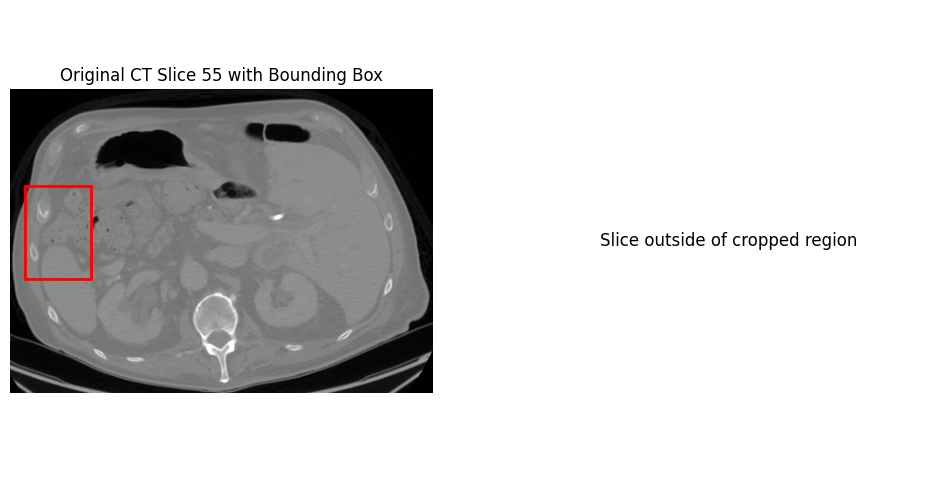

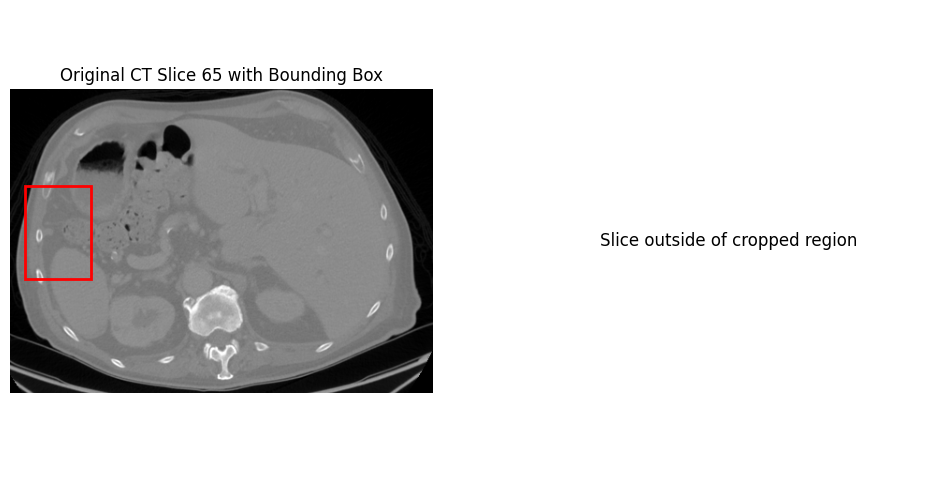

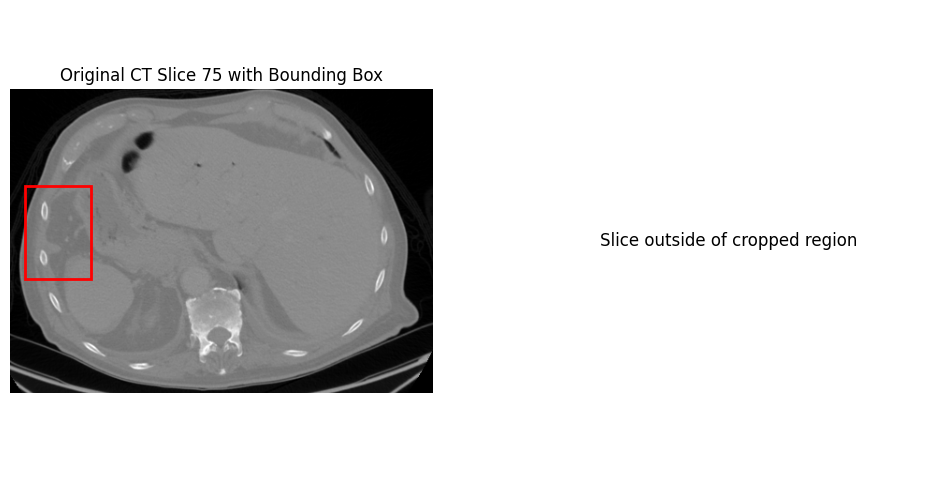

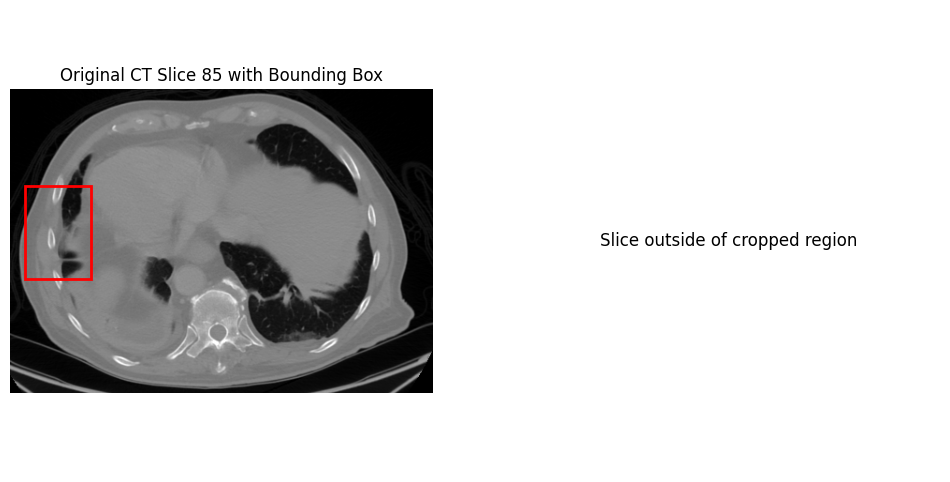

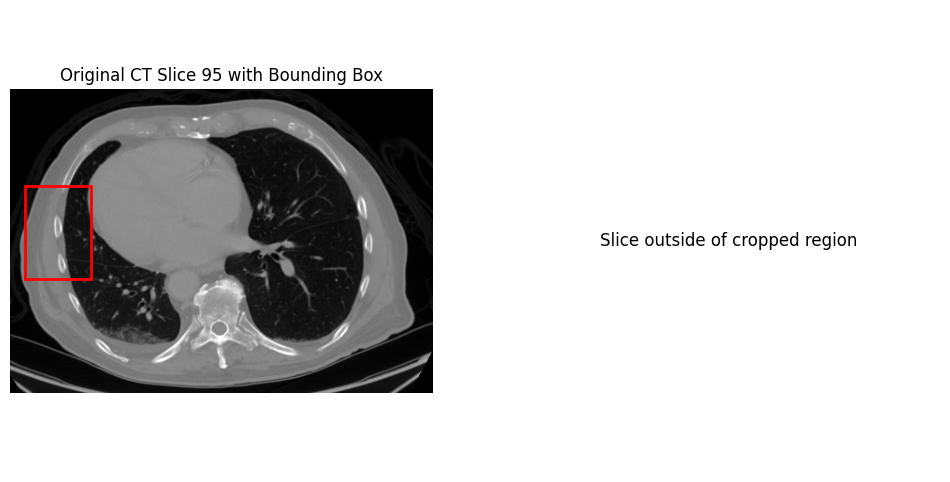

In [41]:
cropped_ct, cropped_segmentation, bbox = get_pancreas_bounding_box(ct_scan_path, segmentation_path, margin=20)

# Load raw CT to pass into the plot function (without cropping)
# raw_ct = nib.load(ct_scan_path).get_fdata()

# Plot the original CT with the bounding box and the corresponding cropped region
plot_cropped_pancreas_and_bbox(raw_ct.get_fdata(), cropped_ct, bbox, [55,65,75,85,95])

In [75]:
def plot_2d_slices_with_segmentation(raw_ct, segmentation_mask, slice_interval=20):
    """
    Plot 2D slices of the CT scan with the binary segmentation mask overlaid in red.
    
    Parameters:
        raw_ct (ndarray): The full original CT scan (numpy array).
        segmentation_mask (ndarray): The binary segmentation mask (numpy array).
        slice_interval (int): Interval between slices to plot (default: every 20th slice).
    """
    
    # Choose the axis along which to slice (e.g., axial slices along the z-axis)
    num_slices = raw_ct.shape[2]
    
    # Determine how many slices we are plotting
    num_plots = num_slices // slice_interval
    
    # Create a figure with subplots, one for each slice
    fig, axes = plt.subplots(1, num_plots, figsize=(20, 10))
    
    # Plot every Nth slice
    for i in range(num_plots):
        slice_idx = i * slice_interval
        
        # Extract the CT slice and the corresponding segmentation mask slice
        ct_slice = raw_ct[:, :, slice_idx]
        seg_slice = segmentation_mask[:, :, slice_idx]
        
        # Rotate the slices 90 degrees counter-clockwise
        ct_slice_rotated = np.rot90(ct_slice)
        seg_slice_rotated = np.rot90(seg_slice)
        
        # Plot the CT slice in grayscale
        ax = axes[i]
        ax.imshow(ct_slice_rotated, cmap='gray', interpolation='none')
        
        # Overlay the segmentation mask in red, with transparency
        ax.imshow(seg_slice_rotated, cmap='Oranges_r', alpha=0.5, interpolation='none')

        # ValueError: 'red' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Grays', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_grey', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gist_yerg', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'grey', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'
        
        # Set the title for each slice
        ax.set_title(f'Slice {slice_idx}')
        ax.axis('off')  # Turn off axis labels
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

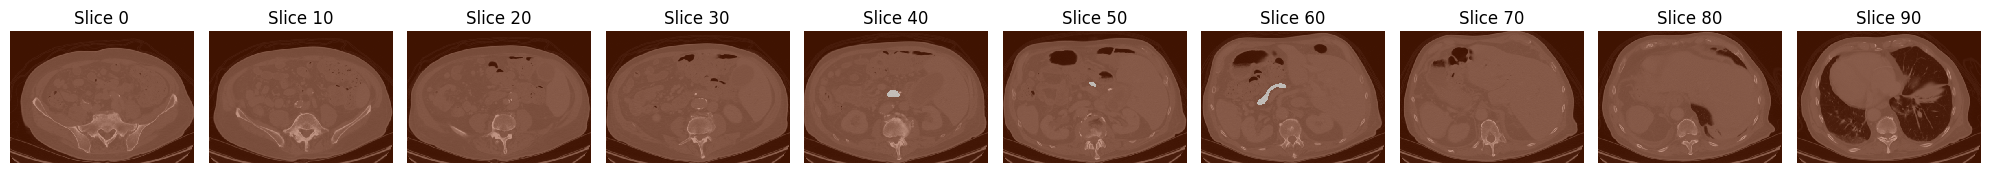

In [76]:
# Example usage:
# Assuming you have `raw_ct` and `segmentation_mask` as Numpy arrays:
plot_2d_slices_with_segmentation(raw_ct.get_fdata(), segmentation_mask.get_fdata(), slice_interval=10)

In [23]:
raw_ct.shape

(452, 324, 103)

In [24]:
cropped_ct.shape

(152, 100, 71)

# 2. Encode Images using VQ-GAN Encoder

<font color="color: #ff7f50;">

- [x] Take $96^3$ subcubes

- - [ ] Take different size subcubes?

</font>

- [x] <font color="gray"><s>Deal w/ padding - Unnecessary</s></font>

In [1]:
%cd STEP1.AutoencoderModel/

/Users/ariellubonja/prog/DiffTumor/STEP1.AutoencoderModel


<font color="blue">

#### 2.1 Load Encoder model from DiffTumor

</font>

In [ ]:
import torch
from vq_gan_3d.model.vqgan import VQGAN
from torchvision import transforms
import nibabel as nib
import numpy as np

# Load the pretrained VQGAN model
vqgan_ckpt = '../STEP2.DiffusionModel/pretrained_models/AutoencoderModel.ckpt'
vqgan_model = VQGAN.load_from_checkpoint(vqgan_ckpt).cuda()
vqgan_model.eval()


def tile_3d_data(data, tile_size=96, stride=96):
    # Calculate the number of patches needed in each dimension
    D, H, W = data.shape
    D_tiles = (D - tile_size) // stride + 1
    H_tiles = (H - tile_size) // stride + 1
    W_tiles = (W - tile_size) // stride + 1

    # Initialize a list to store the patches
    patches = []

    # Extract patches
    for d in range(0, D_tiles * stride, stride):
        for h in range(0, H_tiles * stride, stride):
            for w in range(0, W_tiles * stride, stride):
                patch = data[d:d + tile_size, h:h + tile_size, w:w + tile_size]
                patches.append(torch.tensor(patch, dtype=torch.float32))

    return torch.stack(patches)
    

# Define a function to encode 3D CT scans using the encoder from VQGAN
def encode_ct_scan(nii_path):
    # Load and preprocess the CT scan
    img = nib.load(nii_path)
    img_data = img.get_fdata()

    # Tile the data into 96x96x96 patches
    tiles = tile_3d_data(img_data, tile_size=96, stride=96)
    tiles = tiles.unsqueeze(1)  # Add channel dimension (1 for grayscale)

    # Encode each tile separately
    encoded_tiles = []
    with torch.no_grad():
        for tile in tiles:
            tile = tile.unsqueeze(0).cuda()  # Add batch dimension and move to GPU
            encoded_tile = vqgan_model.encode(tile, quantize=False, include_embeddings=True)
            encoded_tiles.append(encoded_tile.cpu())

    return torch.stack(encoded_tiles)

/scratch4/randalburns/DiffTumor/venv-py38/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/scratch4/randalburns/DiffTumor/venv-py38/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#### 2.2 Input images into Encoder

Do not use Codebook for first run. Use plain Encoder output

- [ ] Loop over all images - both Healthy and Unhealthy
- [ ] Future: plot Codebook itself
- [ ] <font color="purple">Why 12 extra channels?</font>

In [ ]:
import os

# Step 3: Use the function to encode a new CT image
nii_path = os.path.join(download_folder, filename)

img = nib.load(nii_path)
img.shape

The above shape should match what you see in ITK-Snap

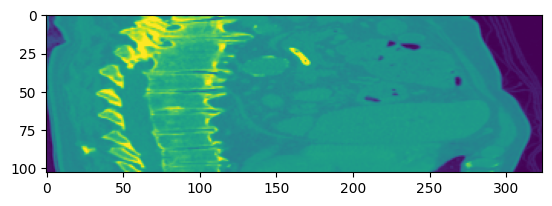

In [12]:
from matplotlib import pyplot as plt

plt.imshow(img.get_fdata()[220].T)

In [ ]:
encoded_image = encode_ct_scan(nii_path)
print(encoded_image.shape)  # Inspect the shape of the encoded image

torch.Size([12, 1, 8, 24, 24, 24])


In [11]:
enc_img = encoded_image.squeeze()
print(enc_img.shape)

torch.Size([12, 8, 24, 24, 24])


# 3. Dimensional Reduction on the 8 channels

- [ ] How exactly? Flatten into $24^3 \times 8$ 2D matrix, then dim-reduce along 8
- [ ] T-SNE
- [ ] PCA
- [ ] LDA
- [ ] DINOv2? Read what that uses

In [ ]:
# Flatten Encoded img into 2D matrix of (n_flatten, 8)
# Ask ChatGPT for PCA code into 3 components

#### 3.1 Plot Encoded Images

- [ ] Work w/ Zongwei to understand these plots

# 4. Cluster VQ-GAN Encodings

- [ ] <font color="purple">Based on what?</font>
- - [ ] Caveman idea: Flatten whole $24^3 \times 8$ into 1D vector. Cluster using that
- [ ] Use ground truth as color in plots (but don't use for clustering)

## How to keep subcubes on top of Pancreas?